# Data Exploration

In [38]:
#imports
import numpy as np
import pandas as pd
import save as sv
import capture as cp

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#pd.set_option("display.max_rows", None, "display.max_columns", None)

from __future__ import division

SyntaxError: from __future__ imports must occur at the beginning of the file (cell_name, line 16)

In [40]:
#Read dataset
data = pd.read_csv('../data/gitrater.csv',index_col=0)
print(len(data))
data.head()

230


,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"{'Rust', 'Ruby', 'Shell', 'JavaScript', 'HTML'...",10,1,437,0,0.25,6,3.5,4.5,4.0
1,0,0,0,1,0.00,set(),0,0,1,159,0.00,0,0.0,0.0,0.0
2,12,1,182,0,0.00,"{'Ruby', 'Shell', 'JavaScript', 'PHP', 'CSS'}",5,0,433,3,0.23,36,4.0,3.0,4.0
3,13,31,0,17,0.00,"{'JavaScript', 'HTML', 'PHP'}",3,0,20,0,0.50,2,2.0,2.0,2.0
4,99,344,370,16,23.12,"{'Jupyter Notebook', 'Shell', 'JavaScript', 'H...",10,0,255,6,0.02,3,5.0,3.0,4.0


## Target Variable 
Obtain the GitHub profile ratings

In [3]:
data[['r1','r2','y']].head()

,r1,r2,y
0,3.5,4.5,4.0
1,0.0,0.0,0.0
2,4.0,3.0,4.0
3,2.0,2.0,2.0
4,5.0,3.0,4.0


In [5]:
print(round(np.mean(data['r1']),2))
print(round(np.mean(data['r2']),2))
print(round(np.mean(data['y']),2))

2.51
2.13
2.33


In [6]:
r1_count = round(data['r1']).value_counts().sort_index()
r2_count = round(data['r2']).value_counts().sort_index()

<BarContainer object of 6 artists>

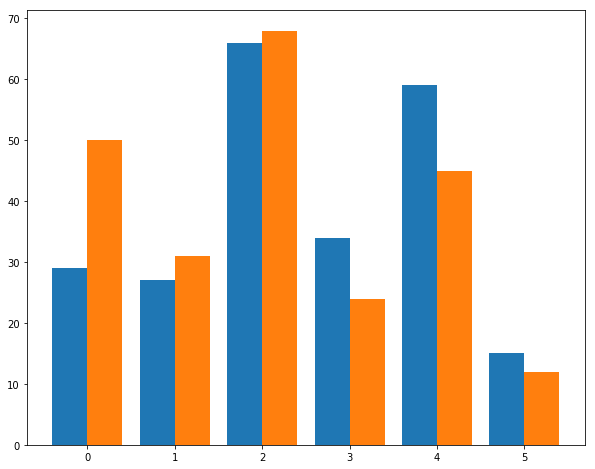

In [7]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))
width = 0.4
plt.bar(r1_count.index-width/2,r1_count,width= width, label = 'Rating 1')
plt.bar(r2_count.index+width/2,r2_count,width= width, label = 'Rating 2')

In [8]:
np.corrcoef(data['r1'],data['r2'])

array([[1.        , 0.80799819],
       [0.80799819, 1.        ]])

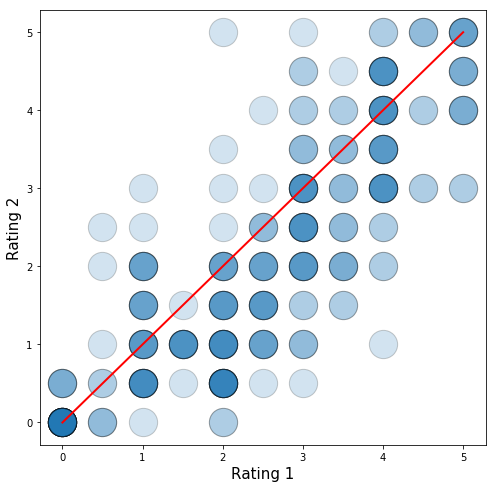

In [9]:
plt.subplots(nrows=1, ncols=1,figsize=(8,8))
plt.scatter(data['r1'],data['r2'],s=800,alpha=0.2,edgecolors='#000000')
plt.ylabel("Rating 2",size=15)
plt.xlabel('Rating 1',size=15)

plt.plot([0, 5], [0, 5], 'r-', lw=2)

plt.savefig('../figures/ratings_consistency.png',format='png')

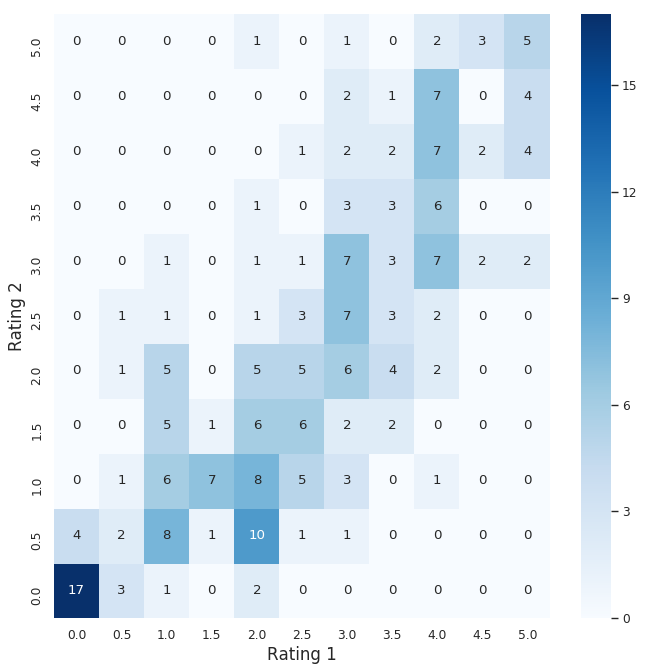

In [12]:
labels = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]


mat = []
for i in labels:
    vec = []
    for j in labels:
        vec.append(len(data[(data.r2==i) & (data.r1==j)]))
    mat.append(vec)
    
mat_df = pd.DataFrame(mat,columns=labels,index=labels)

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(font_scale=1)

ax = plt.axes()
sns.heatmap(mat_df,cmap="Blues",ax=ax,annot=True,fmt='.5g')

plt.ylabel("Rating 2",size=15)
plt.xlabel('Rating 1',size=15)
ax.invert_yaxis()

plt.savefig('../figures/ratings_consistency2.png',format='png')

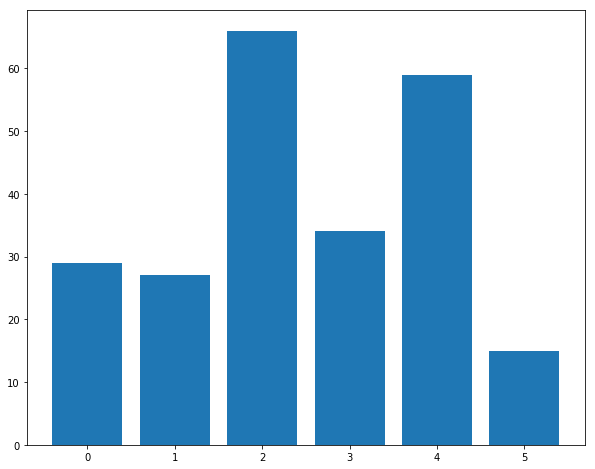

In [6]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))
width = 0.8
plt.bar(r1_count.index,r1_count,width= width, label = 'Rating 1')

plt.savefig('../figures/ratings_final.png',format='png')

# Features

# Contributions


In [10]:
cont_stats = data[['n_cont','y']].groupby('y').agg(['count','min','max','mean'])
cont_stats['n_cont']

,count,min,max,mean
y,,,,
0.0,27,0,4,0.777778
1.0,41,0,435,20.780488
2.0,65,0,1057,62.076923
3.0,34,26,598,190.147059
4.0,51,109,8036,937.313725
5.0,12,726,2835,1703.500000


In [11]:
cont_stats = data[data['n_cont']!=8036][['n_cont','y']].groupby('y').agg(['count','min','max','mean'])
cont_stats['n_cont']

,count,min,max,mean
y,,,,
0.0,27,0,4,0.777778
1.0,41,0,435,20.780488
2.0,65,0,1057,62.076923
3.0,34,26,598,190.147059
4.0,50,109,2587,795.340000
5.0,12,726,2835,1703.500000


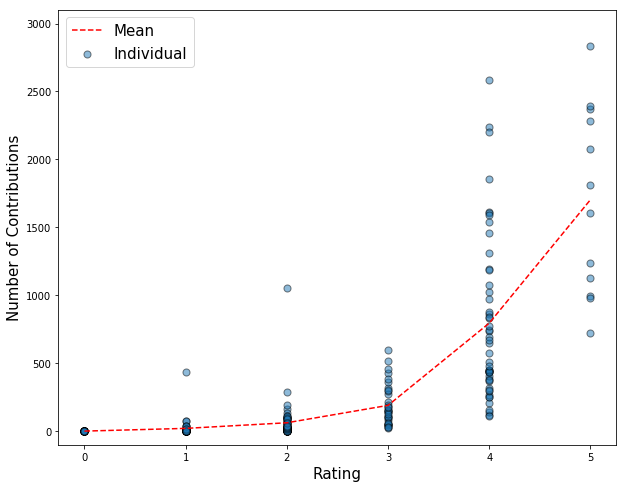

In [12]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['n_cont'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(cont_stats['n_cont']['mean'],'r--',label='Mean')
plt.ylabel("Number of Contributions",size=15)
plt.xlabel('Rating',size=15)
plt.ylim(-100,3100)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../figures/cont_rating.png',format='png')

In [71]:
cont_stats = data[['last_cont','y']].groupby('y').agg(['count','min','max','mean'])
cont_stats['last_cont']

,count,min,max,mean
y,,,,
0.0,27,0,303,61.518519
1.0,41,0,308,73.219512
2.0,65,0,281,49.215385
3.0,34,0,247,29.000000
4.0,51,0,28,4.470588
5.0,12,0,4,1.416667


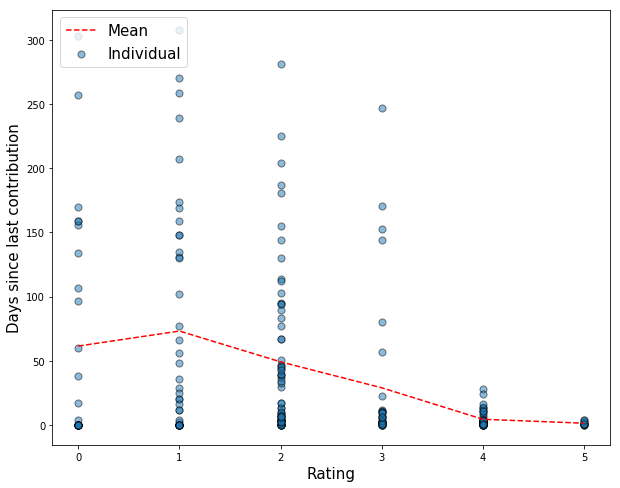

In [73]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['last_cont'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(cont_stats['last_cont']['mean'],'r--',label='Mean')
plt.ylabel("Days since last contribution",size=15)
plt.xlabel('Rating',size=15)
#plt.ylim(-100,3100)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../figures/cont_rating.png',format='png')

In [75]:
cont_stats = data[data['stab_cont']!=8036][['stab_cont','y']].groupby('y').agg(['count','min','max','mean'])
cont_stats['stab_cont']

,count,min,max,mean
y,,,,
0.0,27,0.00,1.00,0.148148
1.0,41,0.00,1.00,0.222439
2.0,65,0.00,1.00,0.219538
3.0,34,0.00,0.60,0.219118
4.0,51,0.02,0.87,0.251961
5.0,12,0.12,0.55,0.286667


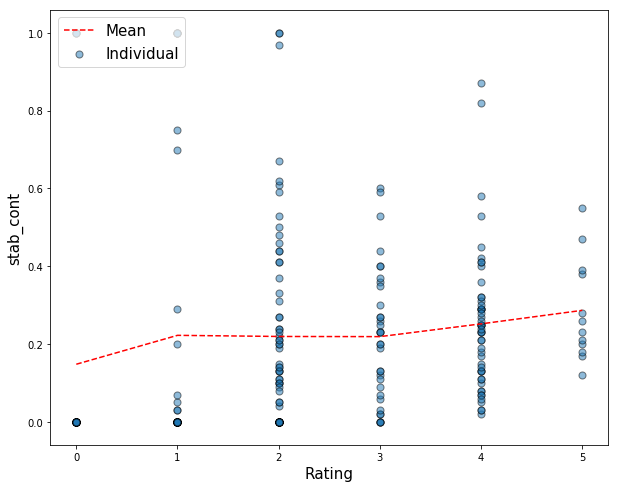

In [78]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['stab_cont'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(cont_stats['stab_cont']['mean'],'r--',label='Mean')
plt.ylabel("stab_cont",size=15)
plt.xlabel('Rating',size=15)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../figures/stab_cont_rating.png',format='png')

# Repos

In [13]:
repos_stats = data[['repos','y']].groupby('y').agg(['count','min','max','mean'])
repos_stats['repos']

,count,min,max,mean
y,,,,
0.0,27,0,55,3.962963
1.0,41,1,3300,190.390244
2.0,65,2,1600,80.353846
3.0,34,4,2500,181.500000
4.0,51,1,264,62.941176
5.0,12,18,467,122.833333


In [70]:
repos_stats = data[data['repos']<500][['repos','y']].groupby('y').agg(['count','min','max','mean'])
repos_stats['repos']

,count,min,max,mean
y,,,,
0.0,27,0,55,3.962963
1.0,37,1,189,23.351351
2.0,63,2,444,43.380952
3.0,31,4,270,53.516129
4.0,51,1,264,62.941176
5.0,12,18,467,122.833333


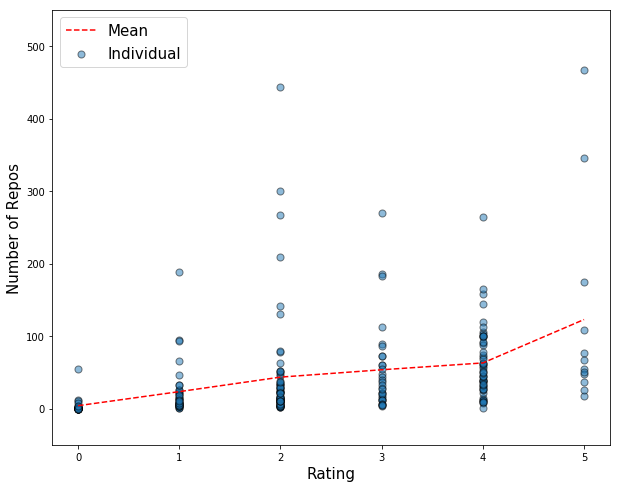

In [74]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['repos'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(repos_stats['repos']['mean'],'r--',label='Mean')
plt.ylabel("Number of Repos",size=15)
plt.xlabel('Rating',size=15)
plt.ylim(-50,550)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../figures/repo_rating.png',format='png')

In [81]:
cont_stats = data[data['cont_repo_ratio']!=8036][['cont_repo_ratio','y']].groupby('y').agg(['count','min','max','mean'])
cont_stats['cont_repo_ratio']

,count,min,max,mean
y,,,,
0.0,27,0,2,0.222222
1.0,41,0,18,1.341463
2.0,65,0,528,10.984615
3.0,34,0,120,13.558824
4.0,51,2,694,34.921569
5.0,12,5,115,32.416667


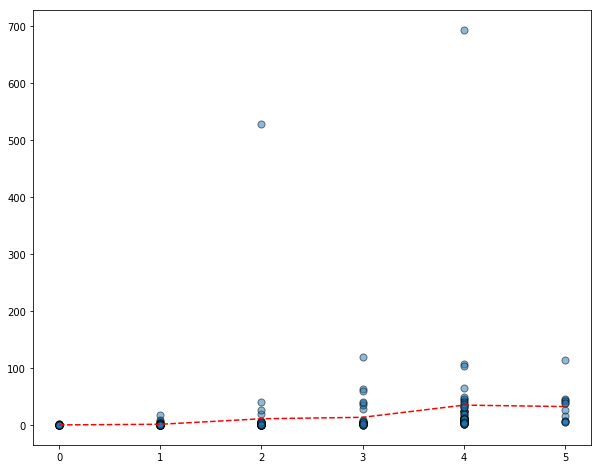

In [85]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['cont_repo_ratio'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(cont_stats['cont_repo_ratio']['mean'],'r--',label='Mean')

KeyError: 'cont_repo_ratio'

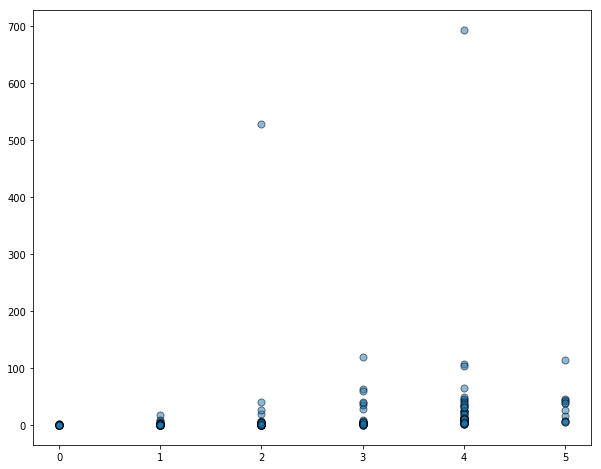

In [82]:


plt.ylabel("cont_repo_ratio",size=15)
plt.xlabel('Rating',size=15)
plt.ylim(-50,550)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../figures/repo_rating.png',format='png')

# Stars

In [75]:
stats = data[['stars','y']].groupby('y').agg(['count','min','max','mean'])
stats['stars']

,count,min,max,mean
y,,,,
0.0,27,0,55,5.703704
1.0,41,0,2800,238.487805
2.0,65,0,3500,348.476923
3.0,34,0,1400,231.352941
4.0,51,0,5400,408.274510
5.0,12,2,4300,720.416667


In [84]:
stats = data[data['stars']<1000][['stars','y']].groupby('y').agg(['count','min','max','mean'])
stats['stars']

,count,min,max,mean
y,,,,
0.0,27,0,55,5.703704
1.0,38,0,821,102.052632
2.0,56,0,730,86.625000
3.0,32,0,795,167.687500
4.0,47,0,942,202.595745
5.0,9,2,214,93.888889


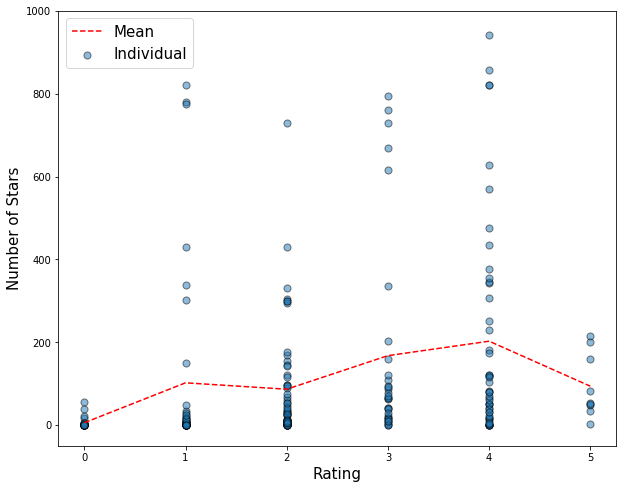

In [87]:
stats = data[data['stars']<1000][['stars','y']].groupby('y').agg(['count','min','max','mean'])
stats['stars']

plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['stars'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(stats['stars']['mean'],'r--',label='Mean')
plt.ylabel("Number of Stars",size=15)
plt.xlabel('Rating',size=15)
plt.ylim(-50,1000)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../figures/stars_rating.png',format='png')

# Organisations

In [15]:
org_0 = data[data.org_flag == 0]['y']
org_1 = data[data.org_flag == 1]['y']

In [43]:
org_0.value_counts().sort_index()

0.0    26
1.0    39
2.0    54
3.0    20
4.0    22
5.0     1
Name: y, dtype: int64

In [17]:
org_1.value_counts().sort_index()

0.0     1
1.0     2
2.0    11
3.0    14
4.0    29
5.0    11
Name: y, dtype: int64

In [7]:
print(np.mean())
print(np.mean(data[data.org_flag == 1]['y']))

1.8518518518518519
3.485294117647059


In [18]:
org_0

1      0.0
2      4.0
3      2.0
4      4.0
6      3.0
7      0.0
8      2.0
9      2.0
10     4.0
12     1.0
14     1.0
15     3.0
16     2.0
17     0.0
18     2.0
20     1.0
21     2.0
22     4.0
23     3.0
24     2.0
25     3.0
26     2.0
29     1.0
30     4.0
31     1.0
32     3.0
35     2.0
39     1.0
40     0.0
43     4.0
      ... 
184    4.0
189    1.0
190    4.0
191    0.0
192    1.0
194    1.0
195    3.0
196    0.0
197    0.0
198    0.0
199    0.0
200    2.0
201    4.0
202    0.0
203    0.0
205    4.0
206    2.0
209    0.0
212    1.0
213    4.0
215    2.0
217    2.0
218    1.0
220    1.0
222    3.0
223    2.0
225    0.0
226    5.0
227    0.0
228    1.0
Name: y, Length: 162, dtype: float64

In [19]:
org_1

0      4.0
5      4.0
11     5.0
13     4.0
19     2.0
27     4.0
28     3.0
33     3.0
34     4.0
36     5.0
37     4.0
38     4.0
41     3.0
42     3.0
49     4.0
56     5.0
57     1.0
59     5.0
60     5.0
62     4.0
67     3.0
70     3.0
71     4.0
72     3.0
80     3.0
83     3.0
84     4.0
85     4.0
95     4.0
103    4.0
      ... 
144    5.0
145    3.0
147    4.0
149    5.0
152    4.0
156    5.0
164    4.0
166    5.0
172    2.0
174    4.0
175    4.0
176    4.0
177    4.0
183    2.0
185    2.0
186    3.0
187    3.0
188    5.0
193    4.0
204    4.0
207    2.0
208    4.0
210    2.0
211    1.0
214    4.0
216    2.0
219    3.0
221    0.0
224    4.0
229    4.0
Name: y, Length: 68, dtype: float64

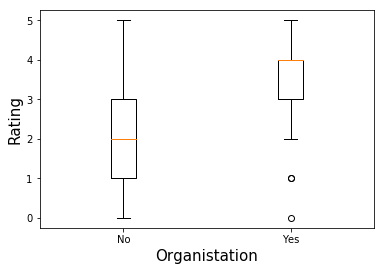

In [42]:
org = [org_0,org_1]
fig, ax = plt.subplots()
#ax.set_title('Organisation Flag',size=20)

ax.boxplot(org,labels=['No','Yes'])
plt.ylabel("Rating",size=15)


plt.xlabel('Organistation',size=15)

plt.show()

# Followers & Following

In [44]:
data

,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"{'Rust', 'Ruby', 'Shell', 'JavaScript', 'HTML'...",10,1,437,0,0.25,6,3.5,4.5,4.0
1,0,0,0,1,0.00,set(),0,0,1,159,0.00,0,0.0,0.0,0.0
2,12,1,182,0,0.00,"{'Ruby', 'Shell', 'JavaScript', 'PHP', 'CSS'}",5,0,433,3,0.23,36,4.0,3.0,4.0
3,13,31,0,17,0.00,"{'JavaScript', 'HTML', 'PHP'}",3,0,20,0,0.50,2,2.0,2.0,2.0
4,99,344,370,16,23.12,"{'Jupyter Notebook', 'Shell', 'JavaScript', 'H...",10,0,255,6,0.02,3,5.0,3.0,4.0
5,264,377,374,212,1.76,"{'TeX', 'HTML', 'Jupyter Notebook', 'Python'}",4,1,1194,2,0.25,5,4.0,4.5,4.0
6,21,110,18,5,3.60,"{'TypeScript', 'JavaScript', 'HTML', 'PHP', 'G...",7,0,107,1,0.36,5,3.0,2.5,3.0
7,1,0,0,1,0.00,set(),0,0,2,107,0.00,2,0.0,0.0,0.0
8,13,730,17,73,0.23,"{'ColdFusion', 'JavaScript', 'Java', 'C++', 'C...",5,0,9,90,0.00,1,2.0,1.0,2.0
9,14,9,2400,1,2400.00,"{'HTML', 'PHP', 'CSS'}",3,0,0,0,0.00,0,3.0,2.0,2.0


In [45]:
stats = data[['followers','y']].groupby('y').agg(['count','min','max','mean'])
stats['followers']

,count,min,max,mean
y,,,,
0.0,27,0,37,3.148148
1.0,41,0,141,16.365854
2.0,65,0,2400,89.061538
3.0,34,1,218,46.235294
4.0,51,11,3700,371.078431
5.0,12,90,9900,1595.666667


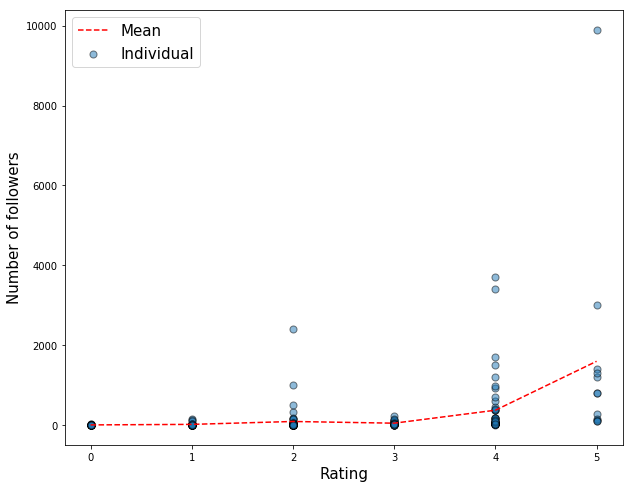

In [49]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['followers'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(stats['followers']['mean'],'r--',label='Mean')
plt.ylabel("Number of followers",size=15)
plt.xlabel('Rating',size=15)
#plt.ylim(-50,1000)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../figures/followers_rating.png',format='png')

In [50]:
stats = data[['following','y']].groupby('y').agg(['count','min','max','mean'])
stats['following']

,count,min,max,mean
y,,,,
0.0,27,0,525,33.777778
1.0,41,0,6600,217.439024
2.0,65,0,4100,367.676923
3.0,34,1,3000,265.647059
4.0,51,0,2300,103.803922
5.0,12,0,474,143.666667


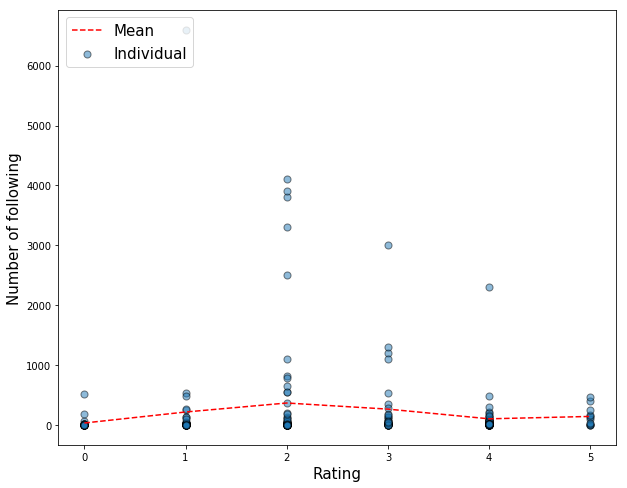

In [52]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data['y'],data['following'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(stats['following']['mean'],'r--',label='Mean')
plt.ylabel("Number of following",size=15)
plt.xlabel('Rating',size=15)
#plt.ylim(-50,1000)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../figures/following_rating.png',format='png')

In [56]:
stats = data[data.foll_ratio<1000][['foll_ratio','y']].groupby('y').agg(['count','min','max','mean'])
stats['foll_ratio']

,count,min,max,mean
y,,,,
0.0,27,0.00,6.00,0.530370
1.0,41,0.00,5.00,0.766585
2.0,64,0.00,31.60,1.504531
3.0,34,0.03,116.00,4.592647
4.0,51,0.00,300.00,17.214314
5.0,12,0.00,353.57,54.730833


In [ ]:
data[data.foll_ratio<1000]['foll_ratio']

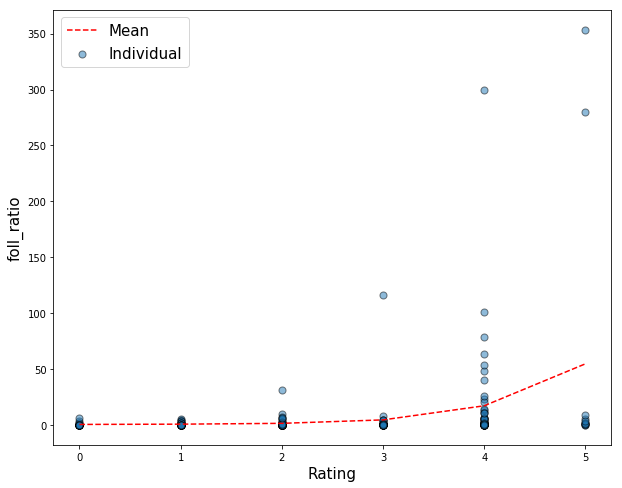

In [61]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data[data.foll_ratio<1000]['y'],data[data.foll_ratio<1000]['foll_ratio'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(stats['foll_ratio']['mean'],'r--',label='Mean')
plt.ylabel("foll_ratio",size=15)
plt.xlabel('Rating',size=15)
#plt.ylim(-50,1000)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../figures/followers_rating.png',format='png')

In [63]:
# Languges

In [64]:
stats = data[data.foll_ratio<1000][['n_lang','y']].groupby('y').agg(['count','min','max','mean'])
stats['n_lang']

,count,min,max,mean
y,,,,
0.0,27,0,7,1.074074
1.0,41,1,13,5.121951
2.0,64,1,12,5.703125
3.0,34,2,14,6.852941
4.0,51,0,13,5.803922
5.0,12,3,9,6.166667


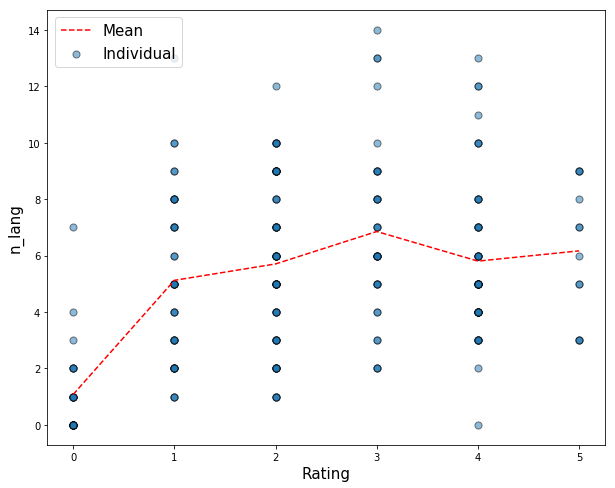

In [66]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))

plt.scatter(data[data.foll_ratio<1000]['y'],data[data.foll_ratio<1000]['n_lang'],s=50,alpha=0.5,edgecolors='#000000',label = 'Individual')

plt.plot(stats['n_lang']['mean'],'r--',label='Mean')
plt.ylabel("n_lang",size=15)
plt.xlabel('Rating',size=15)
#plt.ylim(-50,1000)
plt.legend(loc= 2,prop={'size': 15})


plt.savefig('../figures/followers_rating.png',format='png')

# Correlations

In [65]:
data

,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"{'Rust', 'Ruby', 'Shell', 'JavaScript', 'HTML'...",10,1,437,0,0.25,6,3.5,4.5,4.0
1,0,0,0,1,0.00,set(),0,0,1,159,0.00,0,0.0,0.0,0.0
2,12,1,182,0,0.00,"{'Ruby', 'Shell', 'JavaScript', 'PHP', 'CSS'}",5,0,433,3,0.23,36,4.0,3.0,4.0
3,13,31,0,17,0.00,"{'JavaScript', 'HTML', 'PHP'}",3,0,20,0,0.50,2,2.0,2.0,2.0
4,99,344,370,16,23.12,"{'Jupyter Notebook', 'Shell', 'JavaScript', 'H...",10,0,255,6,0.02,3,5.0,3.0,4.0
5,264,377,374,212,1.76,"{'TeX', 'HTML', 'Jupyter Notebook', 'Python'}",4,1,1194,2,0.25,5,4.0,4.5,4.0
6,21,110,18,5,3.60,"{'TypeScript', 'JavaScript', 'HTML', 'PHP', 'G...",7,0,107,1,0.36,5,3.0,2.5,3.0
7,1,0,0,1,0.00,set(),0,0,2,107,0.00,2,0.0,0.0,0.0
8,13,730,17,73,0.23,"{'ColdFusion', 'JavaScript', 'Java', 'C++', 'C...",5,0,9,90,0.00,1,2.0,1.0,2.0
9,14,9,2400,1,2400.00,"{'HTML', 'PHP', 'CSS'}",3,0,0,0,0.00,0,3.0,2.0,2.0
